In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/byungjooyoo/Dataset/main/hotel_review.csv")
print(df.shape)
print(df.info())
df.head()

(1001, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1001 non-null   int64 
 1   text    1001 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


,rating,text
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입..."
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...


rating    0
text      0
dtype: int64
5    386
4    340
3    155
1     65
2     55
Name: rating, dtype: int64


<AxesSubplot: >

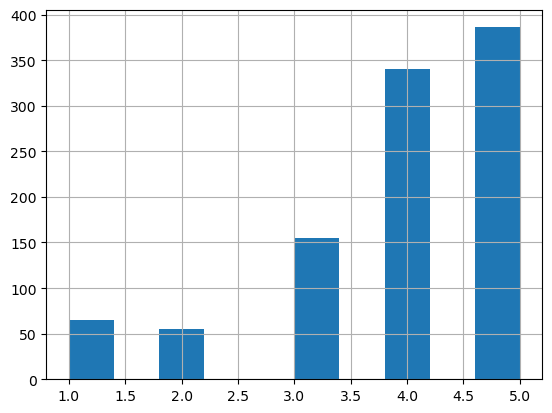

In [2]:
print(df.isnull().sum())
print(df['rating'].value_counts())
df['rating'].hist()

In [3]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0

df['y'] = df['rating'].apply(lambda x: rating_to_label(x))
df["y"].value_counts()


1    726
0    275
Name: y, dtype: int64

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/ko_stopwords.txt
with open("./stopwords.txt", 'r') as f:
    stopwords = []
    for line in f.readlines():
        stopwords.append(line.strip())
print('한글 불용어 개수:', len(stopwords))
stopwords[:10]


한글 불용어 개수: 802


['해서는 안된다', '요만한 것', '야', '삐걱', '이럴정도로', '더욱더', '의해되다', '의', '기대', '전후']

In [7]:
hotel_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
for word in hotel_stopwords:
    stopwords.append(word)
stopwords[-10:]


['여부', '한 까닭에', '할수있다', '제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']

In [8]:
import konlpy
tagger = konlpy.tag.Okt()

tokens=[]
corpus =[]
for i, sentence in enumerate(df['text']):
    para = tagger.nouns(sentence)
    para = [x for x in para if x not in stopwords]
    para = [x for x in para if len(x) > 1]
    tokens.append(para)
    corpus.append(' '.join(para))

print(corpus[:5])
print(tokens[:5])


['집중 휴식 제공 위치 선정 청소 청결 상태', '침대 이불 침구 교체 어메니티 보강 베스트 웨스턴 회원 객실 층수 적극 반영', '지인 소개 세면 도구 잠옷 그것', '정도 박만', '저녁 맥주 한잔 렌트 뚜벅 버스 정류 도착 가방 일찍 정비 방이 입실 업그레이드 직원']
[['집중', '휴식', '제공', '위치', '선정', '청소', '청결', '상태'], ['침대', '이불', '침구', '교체', '어메니티', '보강', '베스트', '웨스턴', '회원', '객실', '층수', '적극', '반영'], ['지인', '소개', '세면', '도구', '잠옷', '그것'], ['정도', '박만'], ['저녁', '맥주', '한잔', '렌트', '뚜벅', '버스', '정류', '도착', '가방', '일찍', '정비', '방이', '입실', '업그레이드', '직원']]


In [9]:
tokens_p, tokens_n = [],[]
for i, token in enumerate(tokens):
    
    if df['y'].values[i]== 1: 
        tokens_p.append(token)
    else :
        tokens_n.append(token)

print(tokens_p)
print(tokens_n)


[['집중', '휴식', '제공', '위치', '선정', '청소', '청결', '상태'], ['침대', '이불', '침구', '교체', '어메니티', '보강', '베스트', '웨스턴', '회원', '객실', '층수', '적극', '반영'], ['지인', '소개', '세면', '도구', '잠옷', '그것'], ['정도', '박만'], ['저녁', '맥주', '한잔', '렌트', '뚜벅', '버스', '정류', '도착', '가방', '일찍', '정비', '방이', '입실', '업그레이드', '직원'], ['손님', '가장', '바다', '배치', '대해', '대응', '써비스', '조식', '부분', '신경', '특급', '트랜디', '대해', '고민', '흔적', '여름', '수영장', '보고'], ['엄마', '가격', '대비', '위치', '주위', '마트', '식당', '시장', '바다', '방문', '의사'], ['정해진', '휘슬', '공항', '생각', '시설', '직원', '친절', '모드', '마무리', '테라스', '전경', '인근', '재래시장', '야시장', '이용도'], ['휘슬락', '체크', '주변', '여친', '추억', '분위기', '추천', '후회'], ['예전', '그랜드', '돌잔치', '다정', '했었더랬', '전통', '메종', '글래드', '업그레이드', '위치', '시설', '서비스', '합리', '가격', '대의', '명절', '글래드', '숙박', '아티', '백미', '커피', '베이커리', '가족', '플러스'], ['지금', '메종', '글래드', '가장', '공항', '접근성', '조식', '만족도', '직원', '기억', '가족', '메종', '찾기'], ['엄마', '침구', '직원', '교통', '이틀', '정원', '거기', '수영장', '겨울', '여름', '추천'], ['친구', '놀러와', '투숙', '객실', '야외', '수영장', '방향', '야간', '조명', '체크', '순간', '대접', 

In [10]:
from collections import Counter
corpus_n, corpus_p = [], []
for token in tokens_p:
    corpus_p.append(' '.join(token))
for token in tokens_n:
    corpus_n.append(' '.join(token))
corpus_p1 = ' '.join(corpus_p).split()
corpus_n1 = ' '.join(corpus_n).split()
counter_p = Counter(corpus_p1)
counter_n = Counter(corpus_n1)
print(counter_p.most_common(10))
print(counter_n.most_common(10))


[('위치', 253), ('공항', 231), ('직원', 177), ('가격', 175), ('시설', 166), ('객실', 160), ('조식', 140), ('바다', 132), ('근처', 130), ('거리', 126)]
[('직원', 90), ('객실', 84), ('침대', 76), ('공항', 75), ('위치', 75), ('가격', 70), ('예약', 67), ('시설', 49), ('아침', 48), ('화장실', 48)]


In [16]:
import platform
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul set complete in your MAC!")
    rc("font", family = "Arial Unicode MS")
    
elif platform.system() == "Windows":
    print("Hangul set complete in your Windows!")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family = font_name)

else:
    print("Unknown your system....")
    
plt.rcParams["axes.unicode_minus"] = False

def seaborn_Hangul():
    ## seaborn 한글
    plt.rc("font", family = "Malgun Gothic")
    sns.set(font="Malgun Gothic", 
    rc={"axes.unicode_minus":False}, style='white')
seaborn_Hangul();

Hangul set complete in your Windows!


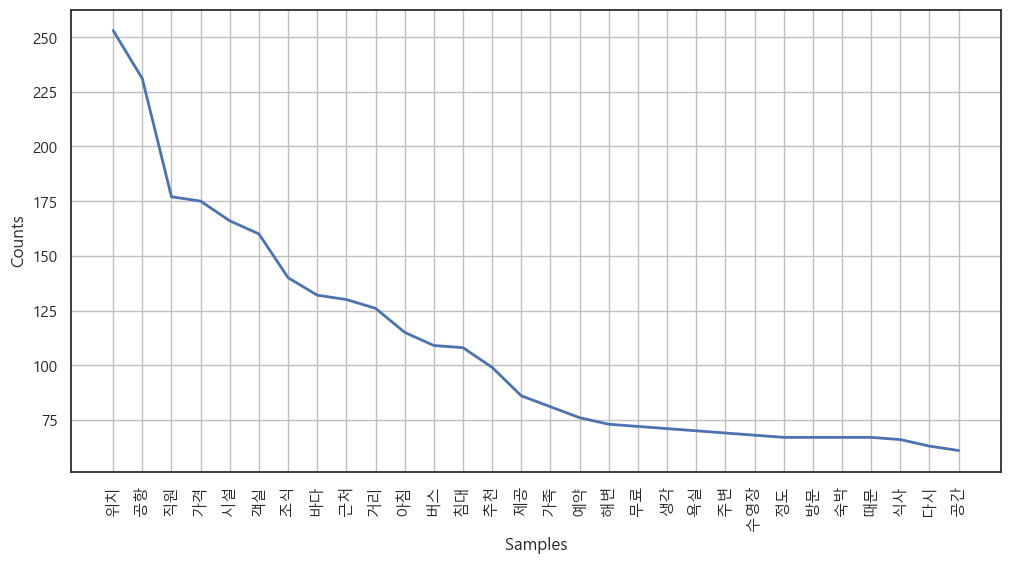

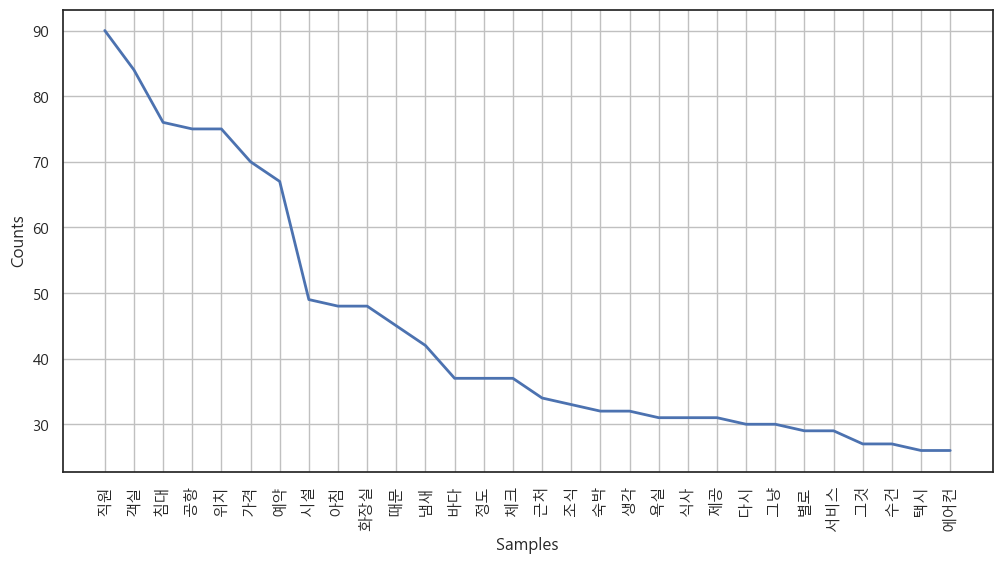

In [19]:
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(corpus_p1)
neg = nltk.Text(corpus_n1)
#plt.rc('font', family='NanumBarunGothic') 

plt.figure(1,figsize=(12,6))
pos.plot(30)

plt.figure(2,figsize=(12,6))
neg.plot(30)
plt.show()


In [22]:
#!pip install gensim

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
print(dtm.shape)
pd.DataFrame(dtm, columns=col)


ModuleNotFoundError: No module named 'gensim'